# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [5]:
df = pd.read_csv("/content/RTA_Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         6010 non-null   object 
 1   Day_of_week                  6010 non-null   object 
 2   Age_band_of_driver           6010 non-null   object 
 3   Sex_of_driver                6010 non-null   object 
 4   Educational_level            5660 non-null   object 
 5   Vehicle_driver_relation      5764 non-null   object 
 6   Driving_experience           5612 non-null   object 
 7   Type_of_vehicle              5526 non-null   object 
 8   Owner_of_vehicle             5779 non-null   object 
 9   Service_year_of_vehicle      4033 non-null   object 
 10  Defect_of_vehicle            3807 non-null   object 
 11  Area_accident_occured        5892 non-null   object 
 12  Lanes_or_Medians             5810 non-null   object 
 13  Road_allignment   

In [10]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,6009.000000,6009.000000
mean,1.974372,1.464636
std,0.625955,0.927887
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,6.000000,8.000000


In [11]:
df.shape

(6010, 32)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,350
Vehicle_driver_relation,246
Driving_experience,398
Type_of_vehicle,484
Owner_of_vehicle,231
Service_year_of_vehicle,1977


In [19]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [21]:
df= df.dropna(subset='Educational_level')

In [27]:
df['Educational_level'].isnull().sum()

0

In [28]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [30]:
df['Area_accident_occured'].nunique()

14

In [31]:
df['Area_accident_occured'].fillna('Unknown', inplace=True)

In [32]:
df['Area_accident_occured'].isnull().sum()

0

In [36]:
df['Lanes_or_Medians'].fillna('Unknown', inplace=True)


In [39]:
df['Road_allignment'].unique()

array(['Tangent road with flat terrain', nan,
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain', 'Tangen'],
      dtype=object)

In [57]:
df['Vehicle_movement'].fillna('Unknown', inplace=True)

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [55]:
df.drop(['Fitness_of_casuality'], axis=1, inplace=True)
df.drop(['Work_of_casuality' ], axis=1, inplace=True)

In [56]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'Unknown', nan, 'With Train'],
      dtype=object)

In [62]:
df.drop(['Road_allignment', ], axis=1, inplace=True)

In [65]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,33
Driving_experience,138
Type_of_vehicle,414
Owner_of_vehicle,170
Service_year_of_vehicle,1788


In [67]:
mode_values = df.mode().iloc[0]
df.fillna(mode_values, inplace=True)

In [68]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5660 entries, 0 to 6009
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         5660 non-null   object 
 1   Day_of_week                  5660 non-null   object 
 2   Age_band_of_driver           5660 non-null   object 
 3   Sex_of_driver                5660 non-null   object 
 4   Educational_level            5660 non-null   object 
 5   Vehicle_driver_relation      5660 non-null   object 
 6   Driving_experience           5660 non-null   object 
 7   Type_of_vehicle              5660 non-null   object 
 8   Owner_of_vehicle             5660 non-null   object 
 9   Service_year_of_vehicle      5660 non-null   object 
 10  Defect_of_vehicle            5660 non-null   object 
 11  Area_accident_occured        5660 non-null   object 
 12  Lanes_or_Medians             5660 non-null   object 
 13  Types_of_Junction      

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

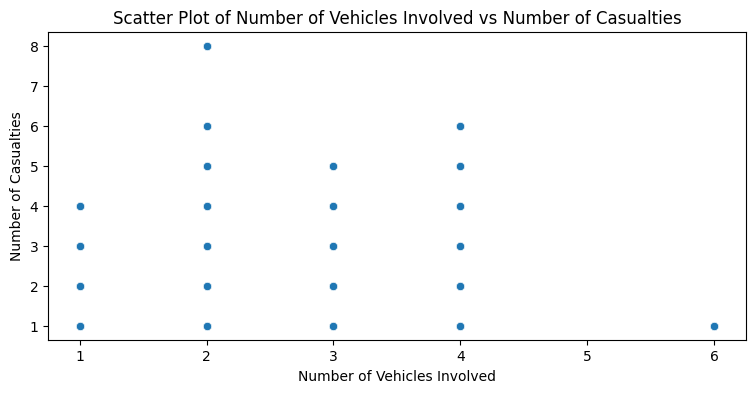

In [109]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', data=df)
plt.title('Scatter Plot of Number of Vehicles Involved vs Number of Casualties')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()

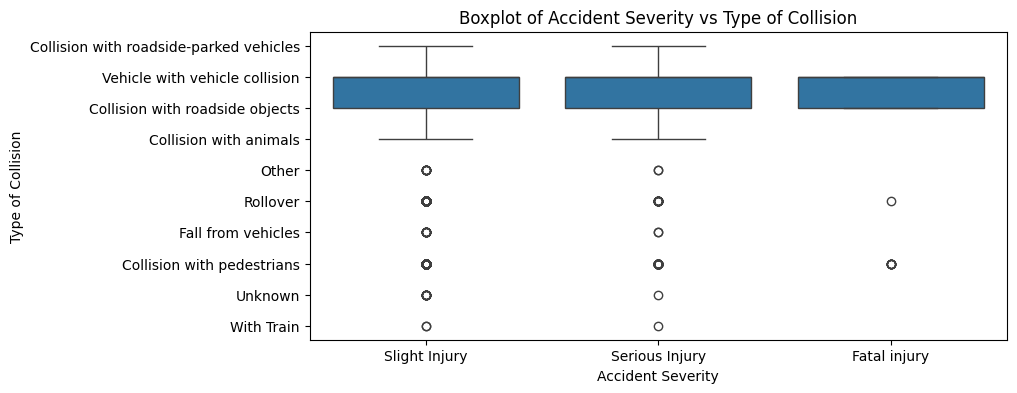

In [110]:
plt.figure(figsize=(9, 4))
sns.boxplot(x='Accident_severity', y='Type_of_collision', data=df)
plt.title('Boxplot of Accident Severity vs Type of Collision')
plt.xlabel('Accident Severity')
plt.ylabel('Type of Collision')
plt.show()

In [83]:
day_of_week_counts = df['Day_of_week'].value_counts()

In [84]:
day_of_week_df = day_of_week_counts.reset_index()
day_of_week_df.columns = ['Day_of_week', 'Accident_count']

<ipython-input-85-6b92bfcbc952>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_week', y='Accident_count', data=day_of_week_df, palette='viridis')


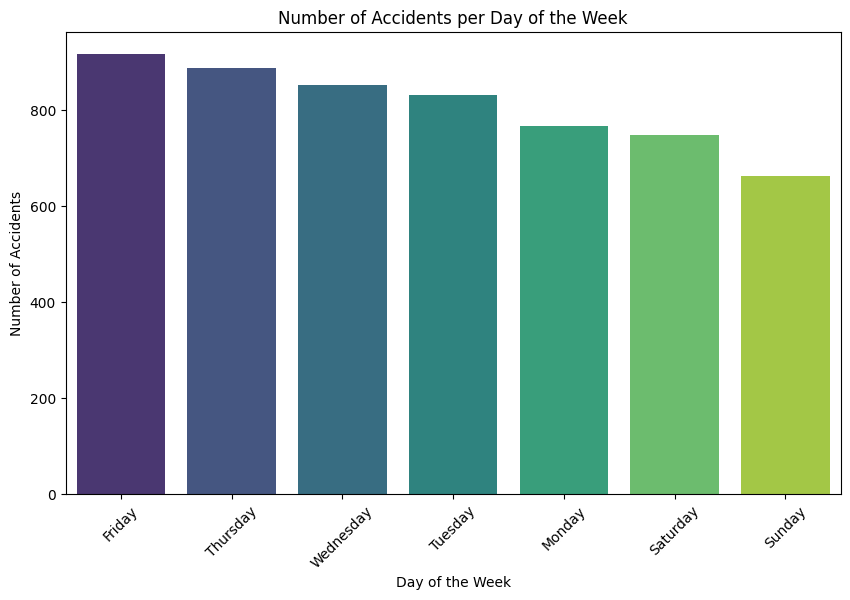

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_week', y='Accident_count', data=day_of_week_df, palette='viridis')
plt.title('Number of Accidents per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [86]:
severity_counts = df['Accident_severity'].value_counts()

In [87]:
severity_df = severity_counts.reset_index()
severity_df.columns = ['Accident_severity', 'Accident_count']

<ipython-input-88-a4ab7997506f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accident_severity', y='Accident_count', data=severity_df, palette='viridis')


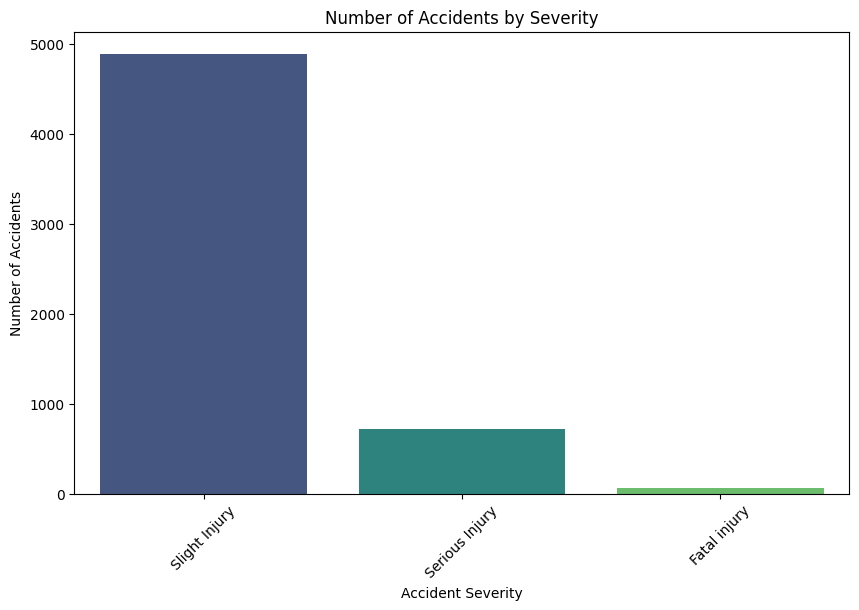

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident_severity', y='Accident_count', data=severity_df, palette='viridis')
plt.title('Number of Accidents by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

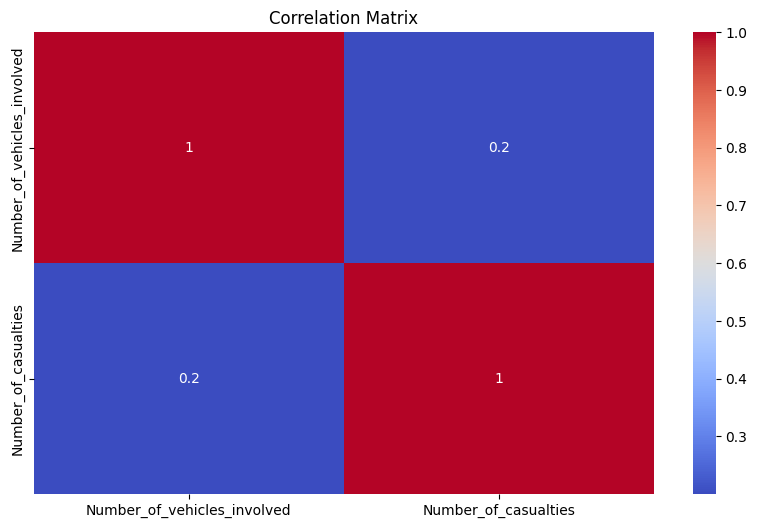

In [95]:
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix on numerical columns
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [99]:
# Select features and target
selected_features = [
    'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Service_year_of_vehicle', 'Area_accident_occured', 'Light_conditions',
    'Weather_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties'
]

X = df[selected_features]
y = df['Accident_severity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 4528
Testing set size: 1132


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [104]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

features = df.drop('Accident_severity', axis=1)
target = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


Logistic Regression:

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        17
Serious Injury       0.67      0.02      0.04       204
 Slight Injury       0.87      1.00      0.93      1477

      accuracy                           0.87      1698
     macro avg       0.51      0.34      0.32      1698
  weighted avg       0.84      0.87      0.81      1698



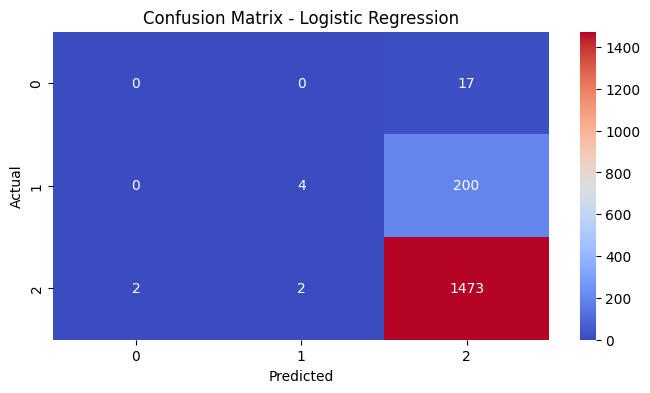

In [111]:


categorical_features = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("Logistic Regression:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Decision Tree Classifier

#### Support Vector Machine (SVM)

In [106]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

ValueError: could not convert string to float: 'Sunday'

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [92]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        17
Serious Injury       0.15      0.03      0.05       204
 Slight Injury       0.87      0.98      0.92      1477

      accuracy                           0.85      1698
     macro avg       0.34      0.34      0.32      1698
  weighted avg       0.78      0.85      0.81      1698



## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Compare Metrics: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
I find it to be an accuracy of 0.87

I noticed that the number of serious injuries is the most numerous.